In [2]:
import tensorflow as tf
import numpy
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")
dataFrame.head()

## veriyi test/train olarak ikiye ayırmak

In [ ]:
sbn.pairplot(dataFrame)
#train_test_split
# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values

# x -> feature (özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

NameError: name 'x_train' is not defined

In [5]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model=Sequential()
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
#çıktı için fazladan 1 tane neron ekle
model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [9]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 2ms/step - loss: 795392.8750
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 794914.1875
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 794379.1250
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 793725.9375
Epoch 5/250
21/21 [==============================] - 0s 4ms/step - loss: 792900.3750
Epoch 6/250
21/21 [==============================] - 0s 3ms/step - loss: 791871.1875
Epoch 7/250
21/21 [==============================] - 0s 3ms/step - loss: 790616.6250
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 789098.3750
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 787280.1250
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 785119.0000
Epoch 11/250
21/21 [==============================] - 0s 3ms/step - loss: 782565.3125
Epoch 12/250
21/21 [==============================] - ETA: 0s -

21/21 [==============================] - 0s 2ms/step - loss: 77.4127
Epoch 194/250
21/21 [==============================] - 0s 2ms/step - loss: 73.8828
Epoch 195/250
21/21 [==============================] - 0s 2ms/step - loss: 76.7149
Epoch 196/250
21/21 [==============================] - 0s 2ms/step - loss: 76.2159
Epoch 197/250
21/21 [==============================] - 0s 2ms/step - loss: 76.5973
Epoch 198/250
21/21 [==============================] - 0s 2ms/step - loss: 78.5127
Epoch 199/250
21/21 [==============================] - 0s 2ms/step - loss: 76.5678
Epoch 200/250
21/21 [==============================] - 0s 2ms/step - loss: 73.7474
Epoch 201/250
21/21 [==============================] - 0s 2ms/step - loss: 77.1705
Epoch 202/250
21/21 [==============================] - 0s 2ms/step - loss: 75.3181
Epoch 203/250
21/21 [==============================] - 0s 2ms/step - loss: 76.2451
Epoch 204/250
21/21 [==============================] - 0s 2ms/step - loss: 76.2867
Epoch 205/250
21/2

<AxesSubplot:>

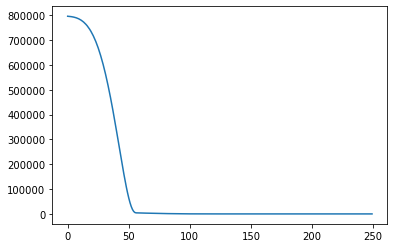

In [10]:
loss=model.history.history["loss"]
#dic içinde loss değerleri
sbn.lineplot(x=range(len(loss)),y=loss)

In [11]:
model.evaluate(x_train,y_train,verbose=0)#88.07022857666016
model.evaluate(x_test,y_test,verbose=0)#93.19542694091797

76.19931030273438

In [12]:
testTahmini=model.predict(x_test)
testTahmini
tahmindf=pd.DataFrame(y_test,columns=["gerçek fiyat"])
tahmindf
#testTahminlerini series liste çevir (şu an numpy list)

,gerçek fiyat
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [13]:
TestTahmini=pd.Series(testTahmini.reshape(330,))
TestTahmini

0      1078.061401
1       623.654358
2       876.178772
3       894.311707
4       899.577820
          ...     
325    1013.761292
326     790.801147
327     765.927307
328    1167.944458
329     802.751343
Length: 330, dtype: float32

In [14]:
tahmindf = pd.concat([tahmindf,TestTahmini],axis=1)
tahmindf.columns = ["Gerçek Y", "Tahmin Y"]
tahmindf

,Gerçek Y,Tahmin Y
0,1081.652164,1078.061401
1,622.675990,623.654358
2,889.356810,876.178772
3,902.826733,894.311707
4,897.662404,899.577820
...,...,...
325,1028.438035,1013.761292
326,789.934950,790.801147
327,758.490486,765.927307
328,1172.871659,1167.944458


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

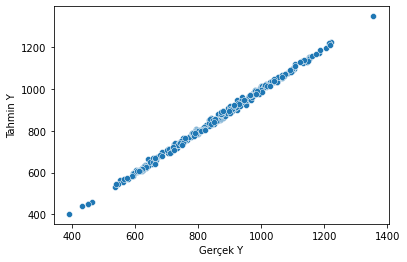

In [15]:
sbn.scatterplot(x="Gerçek Y",y="Tahmin Y",data=tahmindf)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
mean_absolute_error(tahmindf["Gerçek Y"],tahmindf["Tahmin Y"])#7.553288785748104
#mean_squared_error(tahmindf["Gerçek Y"],tahmindf["Tahmin Y"])#88.155700085598

6.991770830263966

In [18]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [19]:
## tahmin etmek için yeni veri verelim
yenibisikletozellikleri=[[1751,1750]]
yenibisikletozellikleri=scaler.transform(yenibisikletozellikleri)
model.predict(yenibisikletozellikleri)

array([[914.4912]], dtype=float32)

In [20]:
#model kayıt etmek için
from tensorflow.keras.models import load_model
model.save("bisikler_modeli.h5")
# çağırmak için 
cagırılanmodel=load_model("bisikler_modeli.h5")

In [21]:
cagırılanmodel.predict(yenibisikletozellikleri)

array([[914.4912]], dtype=float32)